In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from Main_Function import fun_vor_main

In [26]:
def cocircular_points(n=8, r=0.5, center=(0.5, 0.5), eps=0.0, seed=None):
    """
    Generate n points equally spaced on a circle (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    pts = np.c_[center[0] + r * np.cos(angles),
                center[1] + r * np.sin(angles)]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [27]:
def lattice_points(nx=10, ny=10, eps=0.0, seed=None):
    """
    Generate a regular lattice of points (degenerate Voronoi).
    Optional jitter eps breaks exact degeneracy slightly.
    """
    rng = np.random.default_rng(seed)
    xs = np.linspace(1, 10, nx)
    ys = np.linspace(1, 10, ny)
    X, Y = np.meshgrid(xs, ys)
    pts = np.c_[X.ravel(), Y.ravel()]
    if eps > 0:
        pts += rng.normal(scale=eps, size=pts.shape)
    return pts

In [28]:
def make_voronoi(points):
    """Build a Voronoi object from given points."""
    return Voronoi(points, qhull_options="QJ")

In [29]:
def plot_voronoi(vor, points, title="Voronoi diagram"):
    """
    Plot a Voronoi diagram and its generating points.
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    # Plot Voronoi edges
    voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=True, line_colors='k')
    # Overlay the seeds
    ax.plot(points[:, 0], points[:, 1], 'ro', markersize=5, label="Seeds")
    ax.set_title(title)
    ax.set_aspect("equal")
    ax.legend()
    plt.show()


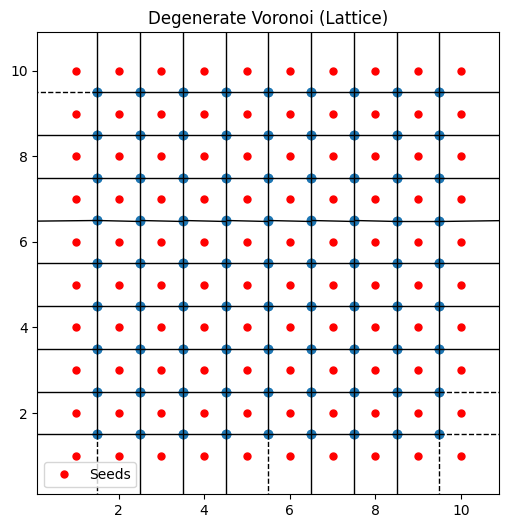

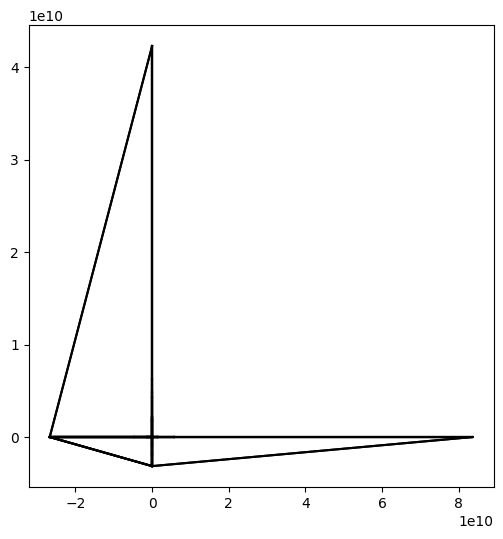

In [30]:
# pts_circ = cocircular_points(n=12, r=0.4, seed=0, eps=0.0)
# vor= make_voronoi(pts_circ)
# plot_voronoi(vor, pts_circ, title="Degenerate Voronoi (Cocircular)")

# Perfect lattice seeds
pts_lat = lattice_points(nx=10, ny=10, seed=1, eps=0.0)
vor_lat = make_voronoi(pts_lat)
plot_voronoi(vor_lat, pts_lat, title="Degenerate Voronoi (Lattice)")

from Generate_explicit_Voronoi import ExplicitVoronoi
explicit_voronoi ,vertices = ExplicitVoronoi(vor_lat)

from Plot_Voronoi import PlotVoronoi
fig, ax = plt.subplots(figsize=(6, 6))
PlotVoronoi(explicit_voronoi, vertices, ax)

from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor_lat,pts_lat)

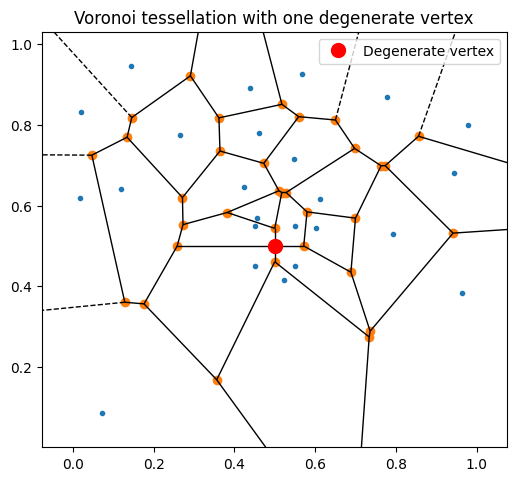

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# 1. Random background points
np.random.seed(0)
random_points = np.random.rand(20, 2)  # 20 points in [0,1]x[0,1]

# 2. Add 4 points forming a square (centered at 0.5,0.5)
square_points = np.array([
    [0.45, 0.45],
    [0.55, 0.45],
    [0.45, 0.55],
    [0.55, 0.55]
])

# 3. Combine
points = np.vstack([random_points, square_points])

# 4. Voronoi diagram
vor = Voronoi(points, qhull_options="Qbb Qc Qx")

# 5. Plot
fig, ax = plt.subplots(figsize=(6,6))
voronoi_plot_2d(vor, ax=ax, show_points=True, show_vertices=True, line_colors='k')

# Highlight the special degenerate vertex (the square’s center)
degenerate_vertex = np.array([0.5, 0.5])
ax.plot(*degenerate_vertex, 'ro', markersize=10, label="Degenerate vertex")

ax.set_aspect("equal")
ax.set_title("Voronoi tessellation with one degenerate vertex")
ax.legend()
plt.show()


In [ ]:
from Main_Function import fun_vor_main
explicit_voronoi, vertices, cell_centers, dist_to_original, dist_to_previous = fun_vor_main(vor,points)

p
# fig, ax = plt.subplots(figsize=(6, 6))
# PlotVoronoi(explicit_voronoi, vertices, ax)


# # compare found cell centers to original points
# print("Original points:\n", points)
# print("Recovered cell centers:\n", cell_centers)
